<a href="https://colab.research.google.com/github/Valaybundele/Neural-Style-Transfer/blob/master/NeuralStyLeTransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import cv2
from PIL import Image
tf.__version__

'2.2.0-rc3'

In [0]:
import keras
content = keras.preprocessing.image.load_img("/content/puppy-dog.jpg")
content_array = keras.preprocessing.image.img_to_array(content)
content_array=content_array/255.0
content_tensor=tf.convert_to_tensor(content_array)


In [0]:
import PIL.Image

def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)


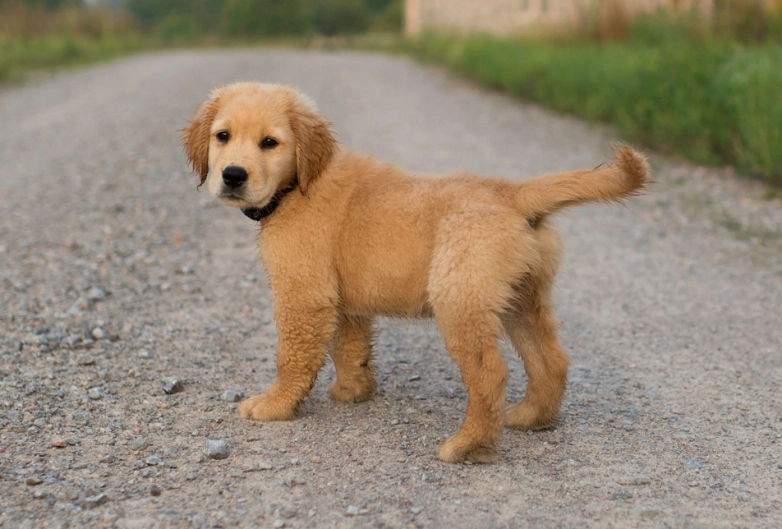

In [0]:

tensor_to_image(content_tensor)

In [0]:
style=keras.preprocessing.image.load_img("/content/Vassily_Kandinsky,_1913_-_Composition_7.jpg")
style_array=keras.preprocessing.image.img_to_array(style)
style_array=style_array/255.0
style_tensor=tf.convert_to_tensor(style_array)

In [0]:
content_layers=['block5_conv2']
style_layers=['block1_conv1', 'block2_conv1','block3_conv1','block4_conv1','block4_conv1']


In [0]:
content_tensor=tf.expand_dims(content_tensor,0)


In [0]:
style_tensor=tf.expand_dims(style_tensor,0)

In [0]:
content_tensor.shape

TensorShape([1, 529, 782, 3])

In [0]:

conimg = tf.image.resize(content_tensor, (500, 500))
styimg = tf.image.resize(style_tensor, (500,500))

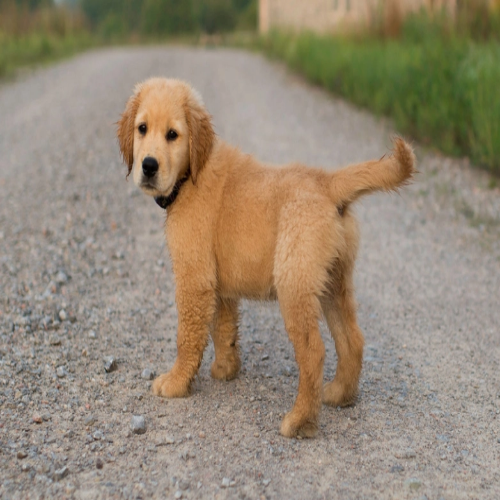

In [0]:
tensor_to_image(conimg)


In [0]:
vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
vgg.trainable=False

80142336/80134624 [==============================] - 1s 0us/step


In [0]:
for layer in vgg.layers :
  print(layer.name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [0]:
def vgg_layers(layer_names):
  """ Creates a vgg model that returns a list of intermediate output values."""
  # Load our model. Load pretrained VGG, trained on imagenet data
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False
  
  
  outputs = [vgg.get_layer(name).output for name in layer_names]

  model = tf.keras.Model([vgg.input], outputs)
  return model

In [0]:
def contentcost(aC,aG) :
   (m,H,W,C)=aC.get_shape().as_list()
   aC=tf.reshape(aC,(H*W,C))
   aG=tf.reshape(aG,(H*W,C))
   cost=(1/(H*C*W))*(tf.math.reduce_sum(tf.math.square(tf.math.subtract(aC,aG)),axis=None,keepdims=False))
   print(cost)
   return cost

In [0]:
def gram_matrix(X) :
  Gmatrix=tf.matmul(X,X,transpose_a=False,transpose_b=True)
  return Gmatrix

In [0]:
def stylelcost(aS,aG) :
  (m,H,W,C)=aS.get_shape().as_list()
  Sgm=gram_matrix(aS)
  Ggm=gram_matrix(aG)
  aS=tf.reshape(aS,(H*W,C))
  aG=tf.reshape(aG,(H*W,C))
  cost=(1/(4*((C)**2)*((H*W)**2)))*(tf.reduce_sum(tf.math.square(tf.math.subtract(Sgm,Ggm)),axis=None,keepdims=False))
  return cost


In [0]:
def totalstylecost(styimg,genimg) :
  aSlist=model2(styimg)
  aGlist=model2(genimg)
  i=0
  cost=0
  for layer in style_layers :
    cost=cost+stylelcost(aSlist[i],aGlist[i])
    i=i+1
  return cost
  

In [0]:
opt = tf.optimizers.Adam(learning_rate=0.01, beta_1=0.99, epsilon=1e-1)



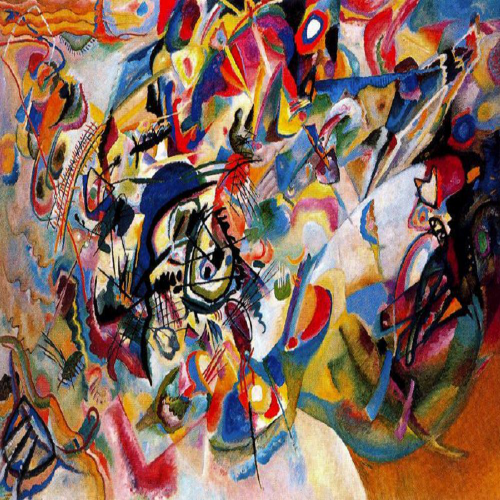

In [0]:
tensor_to_image(styimg)

In [0]:
genimg = tf.Variable(conimg)
genimg.shape

TensorShape([1, 500, 500, 3])

In [0]:
num_epochs=200
alpha=10
beta=100
def clip_0_1(image):
  return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

model1=vgg_layers(content_layers)
model2=vgg_layers(style_layers)
aC=model1(conimg)
def train_step(image):
    with tf.GradientTape() as tape:
       aC=model1(conimg)      
       aG=model1(image)
       content_cost=contentcost(aC,aG)
       style_cost=totalstylecost(styimg,image)
       total_cost=beta*style_cost+alpha*content_cost
       loss = total_cost
       
    grad = tape.gradient(loss, image)
    opt.apply_gradients([(grad, image)])
    image.assign(clip_0_1(image))
for i in range(num_epochs) :
  train_step(genimg)



tf.Tensor(0.025367126, shape=(), dtype=float32)
tf.Tensor(0.025904035, shape=(), dtype=float32)
tf.Tensor(0.02663578, shape=(), dtype=float32)
tf.Tensor(0.027560342, shape=(), dtype=float32)
tf.Tensor(0.028682025, shape=(), dtype=float32)
tf.Tensor(0.029998397, shape=(), dtype=float32)
tf.Tensor(0.031510837, shape=(), dtype=float32)
tf.Tensor(0.033219565, shape=(), dtype=float32)
tf.Tensor(0.03511459, shape=(), dtype=float32)
tf.Tensor(0.03720876, shape=(), dtype=float32)
tf.Tensor(0.039505072, shape=(), dtype=float32)
tf.Tensor(0.041992225, shape=(), dtype=float32)
tf.Tensor(0.044670247, shape=(), dtype=float32)
tf.Tensor(0.047524806, shape=(), dtype=float32)
tf.Tensor(0.05053451, shape=(), dtype=float32)
tf.Tensor(0.053707097, shape=(), dtype=float32)
tf.Tensor(0.057016883, shape=(), dtype=float32)
tf.Tensor(0.060463347, shape=(), dtype=float32)
tf.Tensor(0.0640408, shape=(), dtype=float32)
tf.Tensor(0.06773764, shape=(), dtype=float32)
tf.Tensor(0.071529195, shape=(), dtype=float32)

In [0]:
for i in range(num_epochs) :
  train_step(genimg)


tf.Tensor(75895.79, shape=(), dtype=float32)
tf.Tensor(76843.234, shape=(), dtype=float32)
tf.Tensor(77795.74, shape=(), dtype=float32)
tf.Tensor(78749.03, shape=(), dtype=float32)
tf.Tensor(79703.54, shape=(), dtype=float32)
tf.Tensor(80660.27, shape=(), dtype=float32)
tf.Tensor(81618.016, shape=(), dtype=float32)
tf.Tensor(82575.67, shape=(), dtype=float32)
tf.Tensor(83534.99, shape=(), dtype=float32)
tf.Tensor(84489.72, shape=(), dtype=float32)
tf.Tensor(85441.195, shape=(), dtype=float32)
tf.Tensor(86388.82, shape=(), dtype=float32)
tf.Tensor(87335.97, shape=(), dtype=float32)
tf.Tensor(88277.62, shape=(), dtype=float32)
tf.Tensor(89214.78, shape=(), dtype=float32)
tf.Tensor(90152.81, shape=(), dtype=float32)
tf.Tensor(91095.69, shape=(), dtype=float32)
tf.Tensor(92037.68, shape=(), dtype=float32)
tf.Tensor(92979.22, shape=(), dtype=float32)
tf.Tensor(93919.695, shape=(), dtype=float32)
tf.Tensor(94860.55, shape=(), dtype=float32)
tf.Tensor(95802.03, shape=(), dtype=float32)
tf.Ten

tf.Tensor(0.6865605, shape=(), dtype=float32)
tf.Tensor(0.68770134, shape=(), dtype=float32)
tf.Tensor(0.68882006, shape=(), dtype=float32)
tf.Tensor(0.68991685, shape=(), dtype=float32)
tf.Tensor(0.690992, shape=(), dtype=float32)
tf.Tensor(0.6920417, shape=(), dtype=float32)
tf.Tensor(0.6930733, shape=(), dtype=float32)
tf.Tensor(0.6940898, shape=(), dtype=float32)
tf.Tensor(0.69509166, shape=(), dtype=float32)
tf.Tensor(0.6960741, shape=(), dtype=float32)
tf.Tensor(0.697046, shape=(), dtype=float32)
tf.Tensor(0.69800967, shape=(), dtype=float32)
tf.Tensor(0.6989597, shape=(), dtype=float32)
tf.Tensor(0.6998913, shape=(), dtype=float32)
tf.Tensor(0.70080775, shape=(), dtype=float32)
tf.Tensor(0.7017035, shape=(), dtype=float32)
tf.Tensor(0.7025802, shape=(), dtype=float32)
tf.Tensor(0.7034382, shape=(), dtype=float32)
tf.Tensor(0.7042731, shape=(), dtype=float32)
tf.Tensor(0.70508313, shape=(), dtype=float32)
tf.Tensor(0.7058821, shape=(), dtype=float32)
tf.Tensor(0.7066716, shape=()

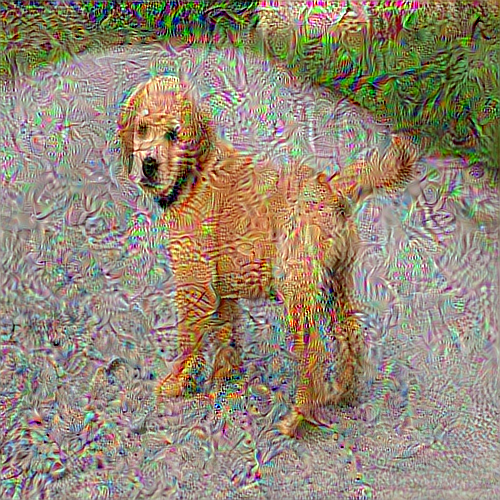

In [0]:
for i in range(num_epochs) :
   train_step(genimg)
tensor_to_image(genimg)
